# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from __future__ import print_function
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
loan_df=pd.read_csv("C:/Users/MY PC/Documents/workspace/Loans_lite.csv")
loan_df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,58490,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,45830,15080.0,1280000.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,30000,0.0,660000.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,25830,23580.0,1200000.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,60000,0.0,1410000.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,609,LP002978,Female,No,0,Graduate,No,29000,0.0,710000.0,360.0,1.0,Rural,Y
616,610,LP002979,Male,Yes,3+,Graduate,No,41060,0.0,400000.0,180.0,1.0,Rural,Y
617,611,LP002983,Male,Yes,1,Graduate,No,80720,2400.0,2530000.0,360.0,1.0,Urban,Y
618,612,LP002984,Male,Yes,2,Graduate,No,75830,0.0,1870000.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         620 non-null    int64  
 1   Loan_ID            620 non-null    object 
 2   Gender             607 non-null    object 
 3   Married            617 non-null    object 
 4   Dependents         605 non-null    object 
 5   Education          620 non-null    object 
 6   Self_Employed      587 non-null    object 
 7   ApplicantIncome    620 non-null    int64  
 8   CoapplicantIncome  620 non-null    float64
 9   LoanAmount         598 non-null    float64
 10  Loan_Amount_Term   606 non-null    float64
 11  Credit_History     569 non-null    float64
 12  Property_Area      620 non-null    object 
 13  Loan_Status        620 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 67.9+ KB


In [7]:
loan_df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,620.000000,620.000000,620.000000,5.980000e+02,606.000000,569.000000
mean,303.730645,53908.483871,16179.143871,1.460385e+06,341.782178,0.841828
std,178.742692,60861.304704,29136.617959,8.541896e+05,65.442363,0.365223
min,0.000000,1500.000000,0.000000,9.000000e+04,12.000000,0.000000
25%,148.750000,28757.500000,0.000000,1.000000e+06,360.000000,1.000000
50%,303.500000,38060.000000,11490.000000,1.275000e+06,360.000000,1.000000
75%,458.250000,57850.000000,22877.500000,1.677500e+06,360.000000,1.000000
max,613.000000,810000.000000,416670.000000,7.000000e+06,480.000000,1.000000


In [8]:
loan_df.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
loan_df.isna().sum()

Unnamed: 0            0
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        33
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       51
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
percentage=(loan_df.isna().sum()/len(loan_df))*100
percentage

Unnamed: 0           0.000000
Loan_ID              0.000000
Gender               2.096774
Married              0.483871
Dependents           2.419355
Education            0.000000
Self_Employed        5.322581
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.548387
Loan_Amount_Term     2.258065
Credit_History       8.225806
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [20]:
loan_df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
loan_df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
loan_df.Married.value_counts()

Yes    404
No     213
Name: Married, dtype: int64

In [28]:
loan_df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [26]:
loan_df.Gender.value_counts()

Male      495
Female    112
Name: Gender, dtype: int64

In [29]:
loan_df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [30]:
loan_df.Self_Employed.value_counts()

No     504
Yes     83
Name: Self_Employed, dtype: int64

In [35]:
loan_df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [37]:
loan_df.Dependents.value_counts()

0     347
2     104
1     103
3+     51
Name: Dependents, dtype: int64

In [38]:
loan_df.Credit_History.unique()

array([ 1.,  0., nan])

In [39]:
loan_df.Credit_History.value_counts()

1.0    479
0.0     90
Name: Credit_History, dtype: int64

In [41]:
loan_df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [42]:
loan_df.Loan_Amount_Term.value_counts()

360.0    517
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      4
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [45]:
loan_df.LoanAmount.nunique()

203

# Checking for duplicate

In [4]:
loan_df.duplicated().sum()

6

In [5]:
# Remove Duplicate
loan_df.drop_duplicates(inplace=True)

In [6]:
loan_df.duplicated().sum()

0

# Data Cleaning

In [9]:
loan_df.Credit_History.astype(object)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
615    1.0
616    1.0
617    1.0
618    1.0
619    0.0
Name: Credit_History, Length: 614, dtype: object

In [17]:
loan_df['Married']=loan_df['Married'].replace(np.nan,'Yes')
loan_df['Gender']=loan_df['Gender'].replace(np.nan,'Male')
loan_df['Dependents']=loan_df['Dependents'].replace(np.nan,'0')
loan_df['Dependents']=loan_df['Dependents'].replace('3+','3')
loan_df['Self_Employed']=loan_df['Self_Employed'].replace(np.nan,'No')
loan_df['Credit_History']=loan_df['Credit_History'].replace('1.0',1.0)


In [18]:
loan_df.Dependents.unique()

array(['0', '1', '2', '3'], dtype=object)

In [19]:
loan_df.isna().sum()

Unnamed: 0            0
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
# Drop Null Values
loan=loan_df.dropna()
loan

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,LP001003,Male,Yes,1,Graduate,No,45830,15080.0,1280000.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,30000,0.0,660000.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,25830,23580.0,1200000.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,60000,0.0,1410000.0,360.0,1.0,Urban,Y
5,5,LP001011,Male,Yes,2,Graduate,Yes,54170,41960.0,2670000.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,609,LP002978,Female,No,0,Graduate,No,29000,0.0,710000.0,360.0,1.0,Rural,Y
616,610,LP002979,Male,Yes,3,Graduate,No,41060,0.0,400000.0,180.0,1.0,Rural,Y
617,611,LP002983,Male,Yes,1,Graduate,No,80720,2400.0,2530000.0,360.0,1.0,Urban,Y
618,612,LP002984,Male,Yes,2,Graduate,No,75830,0.0,1870000.0,360.0,1.0,Urban,Y


In [21]:
loan.isna().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
loan.Credit_History.astype(float)

1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
615    1.0
616    1.0
617    1.0
618    1.0
619    0.0
Name: Credit_History, Length: 578, dtype: float64

# Exploratory Data Analysis

<AxesSubplot:>

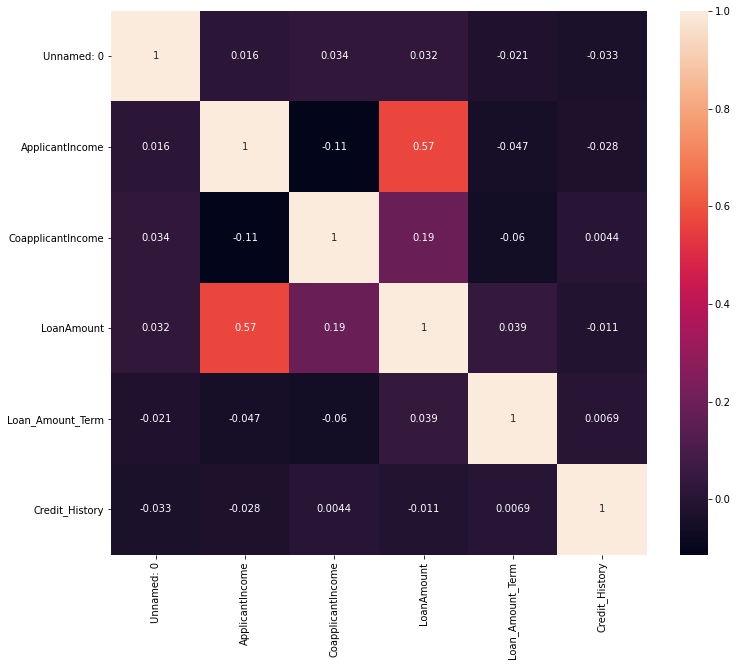

In [108]:
plt.figure(figsize=(12,10))
sns.heatmap(loan.corr(), annot=True)

In [ ]:
# Univariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

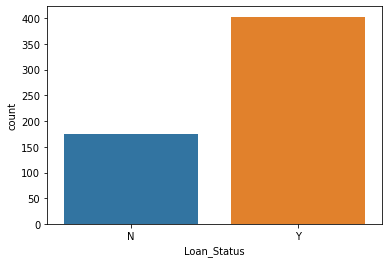

In [112]:
sns.countplot(data=loan,x='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

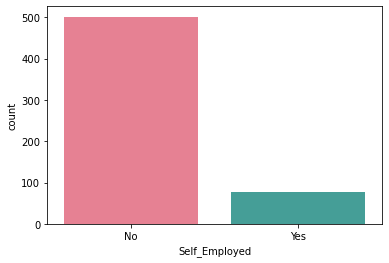

In [117]:
# Count of selfd employed
# applicannt who are not self employed has the highest number of loan application submitted
sns.countplot(data=loan, x='Self_Employed',palette='husl')

<AxesSubplot:xlabel='Gender', ylabel='count'>

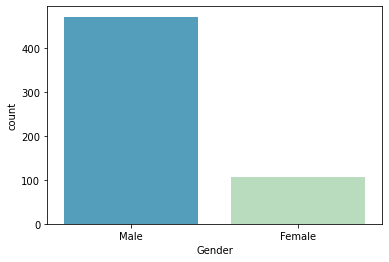

In [121]:
# Count of Gender
# More Male Gender applied for loan
sns.countplot(data=loan, x='Gender', palette='GnBu_r')

In [ ]:
# Bi-Variate Analysis

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

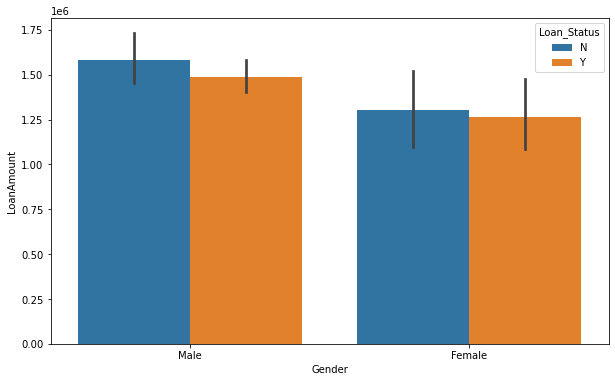

In [126]:
# loan status of gender based on Loan amount
plt.figure(figsize=(10,6))
sns.barplot(data=loan, x='Gender',y='LoanAmount',hue='Loan_Status')
# male applicants has the highest number of loan approval compared to the females

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

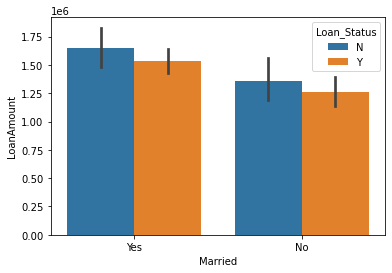

In [131]:
# Loan status of Married Couples per Loan amount
# Married couples has high percentage of getting their loan approved
sns.barplot(data=loan, x='Married',y='LoanAmount', hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

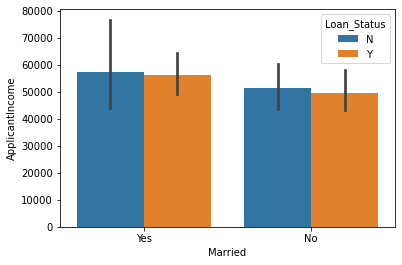

In [132]:
# Loan status of Married Couples per Applicant Income
# Married couples has high percentage of getting their loan approved based on their income
sns.barplot(data=loan, x='Married',y='ApplicantIncome', hue='Loan_Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

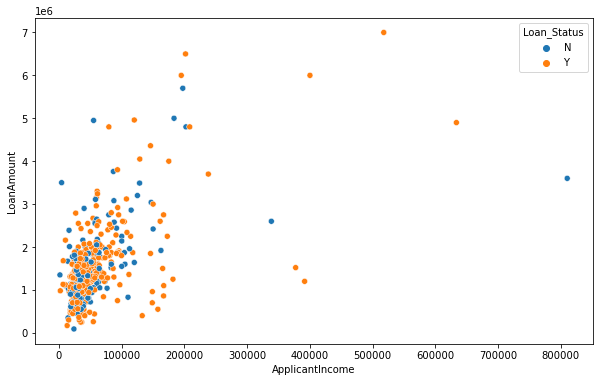

In [135]:
# Loan Statuys of Applicant income against loan amount
plt.figure(figsize=(10,6))
sns.scatterplot(data=loan, x="ApplicantIncome",y="LoanAmount",hue="Loan_Status")

In [109]:
loan.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

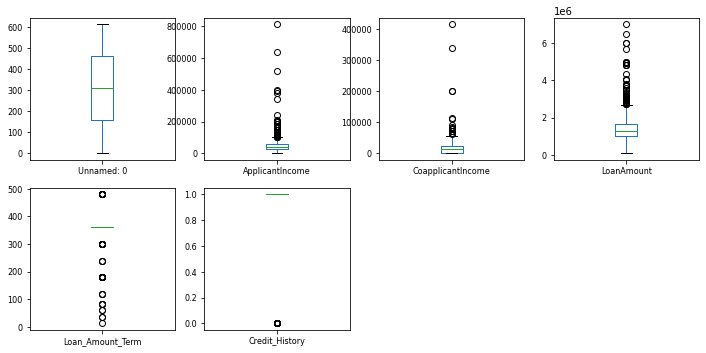

In [136]:
# checking for outier
loan.plot(kind='box', subplots=True, layout=(4,4), fontsize=8,figsize=(12,12));

In [24]:
loan.drop(['Unnamed: 0'],axis=1,inplace=True)

# seperating categorical variable fron Numerical cvariable

In [25]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,45830,15080.0,1280000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,30000,0.0,660000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,25830,23580.0,1200000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,60000,0.0,1410000.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,54170,41960.0,2670000.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,LP002978,Female,No,0,Graduate,No,29000,0.0,710000.0,360.0,1.0,Rural,Y
616,LP002979,Male,Yes,3,Graduate,No,41060,0.0,400000.0,180.0,1.0,Rural,Y
617,LP002983,Male,Yes,1,Graduate,No,80720,2400.0,2530000.0,360.0,1.0,Urban,Y
618,LP002984,Male,Yes,2,Graduate,No,75830,0.0,1870000.0,360.0,1.0,Urban,Y


In [26]:
numerical_var=loan.select_dtypes(include=[np.number])
categorical_var=loan.select_dtypes(exclude=[np.number])

In [27]:
categorical_var.drop(['Loan_ID'],axis=1,inplace=True)

In [28]:
categorical_var

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...,...
615,Female,No,0,Graduate,No,Rural,Y
616,Male,Yes,3,Graduate,No,Rural,Y
617,Male,Yes,1,Graduate,No,Urban,Y
618,Male,Yes,2,Graduate,No,Urban,Y


In [29]:
categorical_var.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [30]:
#data transformation 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_var.loc[:,['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']]=categorical_var.loc[:,['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']].apply(le.fit_transform)
categorical_var


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
5,1,1,2,0,1,2,1
...,...,...,...,...,...,...,...
615,0,0,0,0,0,0,1
616,1,1,3,0,0,0,1
617,1,1,1,0,0,2,1
618,1,1,2,0,0,2,1


In [31]:
# joined bothy cat and num
loan1=pd.concat([numerical_var,categorical_var],axis=1)
loan1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,45830,15080.0,1280000.0,360.0,1.0,1,1,1,0,0,0,0
2,30000,0.0,660000.0,360.0,1.0,1,1,0,0,1,2,1
3,25830,23580.0,1200000.0,360.0,1.0,1,1,0,1,0,2,1
4,60000,0.0,1410000.0,360.0,1.0,1,0,0,0,0,2,1
5,54170,41960.0,2670000.0,360.0,1.0,1,1,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
615,29000,0.0,710000.0,360.0,1.0,0,0,0,0,0,0,1
616,41060,0.0,400000.0,180.0,1.0,1,1,3,0,0,0,1
617,80720,2400.0,2530000.0,360.0,1.0,1,1,1,0,0,2,1
618,75830,0.0,1870000.0,360.0,1.0,1,1,2,0,0,2,1


<Figure size 864x864 with 0 Axes>

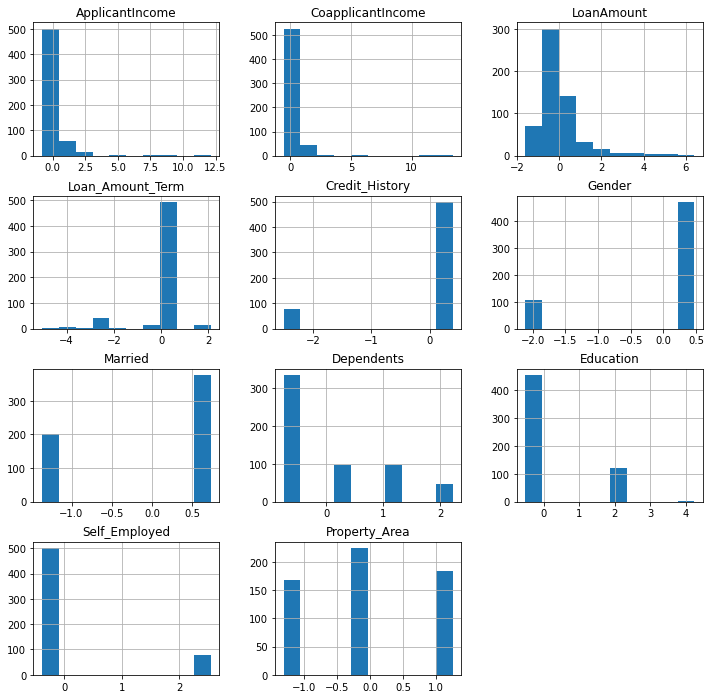

In [176]:
plt.figure(figsize=(12,12))
standard_data.hist(figsize=(12,12));

# Data Modeling 

In [37]:
# Split data into x and y variable
x=loan1.drop(['Loan_Status'],axis=1)
y=loan1['Loan_Status']

In [38]:
# standardize the dataset
sc=StandardScaler()
dataset=sc.fit_transform(x)
standard_data=pd.DataFrame(dataset,columns=x.columns)

In [50]:
x=standard_data
y=loan1['Loan_Status']

In [51]:
# Splitting data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=10)
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(578, 11) (404, 11) (174, 11)
(578,) (404,) (174,)


# Decision Tree Classifier

In [41]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [42]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(x_train,y_train)

predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  78.16091954022988
              precision    recall  f1-score   support

           0       0.83      0.30      0.44        50
           1       0.78      0.98      0.86       124

    accuracy                           0.78       174
   macro avg       0.80      0.64      0.65       174
weighted avg       0.79      0.78      0.74       174



In [184]:
standard_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

In [43]:
features = standard_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area']]
target = loan1['Loan_Status']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = loan1['Loan_Status']

In [44]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [45]:
score.mean()

0.7785757121439281

# Logistic Regression 

In [63]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.8045977011494253
              precision    recall  f1-score   support

           0       0.90      0.36      0.51        50
           1       0.79      0.98      0.88       124

    accuracy                           0.80       174
   macro avg       0.85      0.67      0.70       174
weighted avg       0.82      0.80      0.77       174



In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score
prec=precision_score(predicted_values,y_test)
rec= recall_score(predicted_values,y_test)
f1= f1_score(predicted_values,y_test )
print('Precision:', prec)
print('recall:', rec)
print('f1:',f1)

Precision: 0.9838709677419355
recall: 0.7922077922077922
f1: 0.8776978417266188


In [47]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score.mean()

0.8080359820089955

In [65]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
# transform testing dataabs
x_test_norm = norm.transform(x_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,y_train)
predicted_values = SVM.predict(x_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.8045977011494253
              precision    recall  f1-score   support

           0       0.90      0.36      0.51        50
           1       0.79      0.98      0.88       124

    accuracy                           0.80       174
   macro avg       0.85      0.67      0.70       174
weighted avg       0.82      0.80      0.77       174



In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score
prec=precision_score(predicted_values,y_test)
rec= recall_score(predicted_values,y_test)
f1= f1_score(predicted_values,y_test )
print('Precision:', prec)
print('recall:', rec)
print('f1:',f1)

Precision: 0.9838709677419355
recall: 0.7922077922077922
f1: 0.8776978417266188


In [67]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=10)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.7816091954022989
              precision    recall  f1-score   support

           0       0.73      0.38      0.50        50
           1       0.79      0.94      0.86       124

    accuracy                           0.78       174
   macro avg       0.76      0.66      0.68       174
weighted avg       0.77      0.78      0.76       174



In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score
prec=precision_score(predicted_values,y_test)
rec= recall_score(predicted_values,y_test)
f1= f1_score(predicted_values,y_test )
print('Precision:', prec)
print('recall:', rec)
print('f1:',f1)

Precision: 0.9435483870967742
recall: 0.7905405405405406
f1: 0.8602941176470589
